In [1]:
# %matplotlib notebook
import serial
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [292]:
# close opened serial
if (ser):
    ser.close()

In [29]:
record_time = 5
nChannel = 16
nByte = nChannel*2
serial_port = 'COM5'

end_time = time.time() + record_time

serial_out = []
try:
    ser = serial.Serial(serial_port, 500000)
except:
    ser.close()
    
print(ser.name)

while time.time() < end_time:
    x = ser.read(nByte)
#     x = ser.read_until()
    serial_out.append(x)

    
    
print(len(serial_out))
print(serial_out)
ser.close()

COM5
4993
[b'\x00\x00\x02\xab\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0f\xff\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', b'\x00\x00\x02\xab\x00\x01\x00\x02\x00\x05\x00\x01\x00\x00\x00\x00\x00\x00\x0f\xff\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', b'\x00\x00\x02\xab\x00\x08\x00\x08\x00\x06\x00\x0c\x00\x08\x00\x02\x00\x02\x0f\xff\x00\x08\x00\x06\x00\n\x00\n\x00\x0b\x00\x00', b'\x00\x07\x02\xab\x00\x0c\x00\x0c\x00\n\x00\r\x00\x0c\x00\t\x00\x06\x0f\xfe\x00\x0c\x00\n\x00\x0b\x00\n\x00\x0e\x00\n', b'\x00\x12\x02\xab\x00\x11\x00\x11\x00\x10\x00\x0e\x00\x15\x00\x11\x00\x12\x0f\xff\x00\x12\x00\x13\x00\x0f\x00\x0f\x00\x14\x00\x11', b'\x00\x15\x02\xab\x00\x15\x00\x15\x00\x14\x00\x12\x00\x17\x00\x1b\x00\x1d\x0f\xff\x00\x15\x00\x11\x00\x0f\x00\x14\x00\x14\x00"', b'\x00\x1d\x02\xab\x00\x17\x00\x1a\x00\x1a\x00\x18\x00\x13\x00\x1e\x00!\x0f\xff\x00\x19\x00\x16\x00\x19\x00\x11\x00\x1a\x004', b'\x00\x19\x02\xab\x00\x14\x00\x11\x00\x11\x00\x11\x00\x13\x00\x1b\x00\x1d\x0f\xff\

In [30]:
%%time
samples = np.array([])
for sample in serial_out:
    for channel in range(0,nByte,2):
         samples = np.append(samples, int.from_bytes(sample[channel:channel+2], byteorder='big', signed=False))

samples = np.reshape(samples, (len(serial_out), nChannel))
del serial_out

print(samples[:10])

[[0.000e+00 6.830e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 4.095e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [0.000e+00 6.830e+02 1.000e+00 2.000e+00 5.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 4.095e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [0.000e+00 6.830e+02 8.000e+00 8.000e+00 6.000e+00 1.200e+01 8.000e+00
  2.000e+00 2.000e+00 4.095e+03 8.000e+00 6.000e+00 1.000e+01 1.000e+01
  1.100e+01 0.000e+00]
 [7.000e+00 6.830e+02 1.200e+01 1.200e+01 1.000e+01 1.300e+01 1.200e+01
  9.000e+00 6.000e+00 4.094e+03 1.200e+01 1.000e+01 1.100e+01 1.000e+01
  1.400e+01 1.000e+01]
 [1.800e+01 6.830e+02 1.700e+01 1.700e+01 1.600e+01 1.400e+01 2.100e+01
  1.700e+01 1.800e+01 4.095e+03 1.800e+01 1.900e+01 1.500e+01 1.500e+01
  2.000e+01 1.700e+01]
 [2.100e+01 6.830e+02 2.100e+01 2.100e+01 2.000e+01 1.800e+01 2.300e+01
  2.700e+01 2.900e+01 4.095e+03 2.100e+01 1.700e+01 1.500e+01 2.000e+01
  2.000e+01 3.400e+01

In [221]:
# record = open("signal_record.txt", "w")
# g = (value for value in samples)

# for x in g:
#     for y in x:
#         record.write(str(int(y)) + ",")
#     record.write("\n")
# record.write(((int)value, for value in samples))

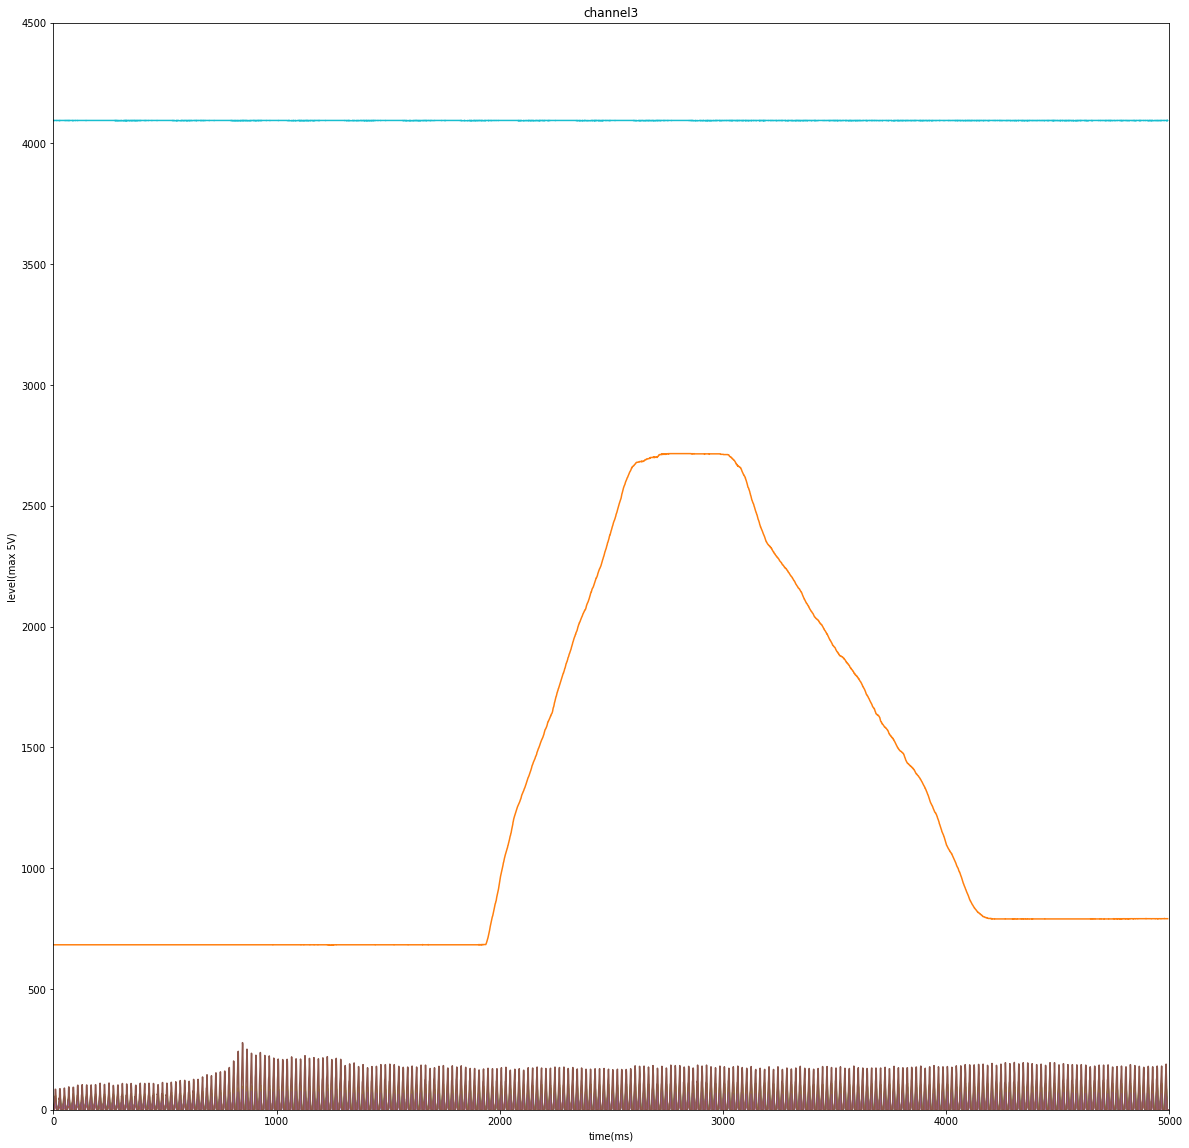

In [31]:
plt.figure(figsize=(20, 20))
plt.xlabel('time(ms)')
plt.ylabel('level(max 5V)')
plt.title('channel3')
plt.plot(samples[:])
plt.axis([0, 5000, 0, 4500])
plt.show()
# Axes3D.plot_wireframe(samples)

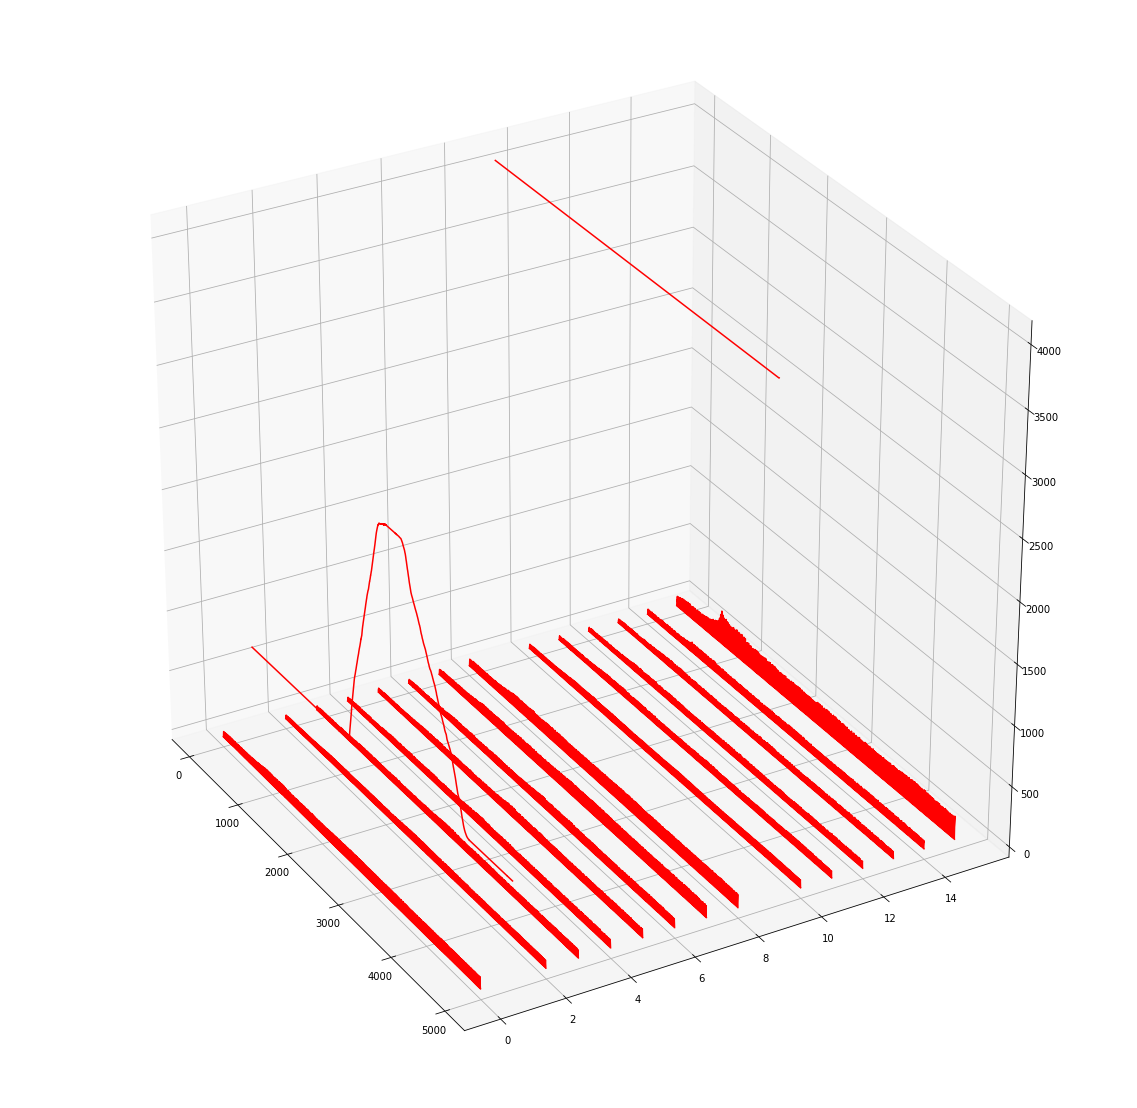

Wall time: 811 ms


In [32]:
%%time
# print(samples[:100])

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(20,20))

datasets = [{"x":np.arange(0, len(samples[:,i]), 1) , "z":samples[:,i], "y":[i for _ in range(len(samples[:,i]))], "colour": "red"} for i in range(nChannel)]

ax.view_init(30, -30)

for dataset in datasets:
    ax.plot(dataset["x"], dataset["y"], dataset["z"], color=dataset["colour"])

plt.show()

COM5


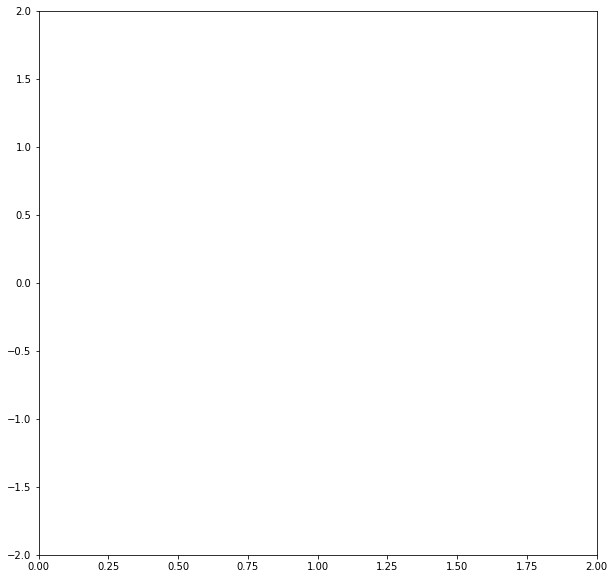

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [23]:
import matplotlib.animation as animation
from IPython.display import HTML

end_time = time.time() + record_time

try:
    ser = serial.Serial(serial_port, 500000)
except:
    ser.close()
    
print(ser.name)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)
xs = []
ys = []

samples = [0]
timeStep = 0

def init():
    line.set_data([], [])
    return line,
    
def animate(i, xs, ys):
#     while time.time() < end_time:
    sample = []
    x = ser.read(nByte)
    for channel in range(0,nByte,2):
        sample.append(int.from_bytes(x[channel:channel+2], byteorder='big', signed=False))
#         if len(samples) > 100:
#             samples.pop(0)
    xs = sample[1]
    ys = i
    print(xs)

#     ax.clear()
#     ax.plot(xs, ys)
    line.set_data(xs, ys)
#     plt.figure(figsize=(10, 10))
    plt.xlabel('time(ms)')
    plt.ylabel('level(max 5V)')
    plt.title('channel3')
    return line,
    

ani = animation.FuncAnimation(fig, animate,init_func=init, frames=100, interval=20, blit=True)
plt.show()

ser.close()

HTML(ani.to_html5_video())